  This script to predict house prices ( Kent County,Washington State )

In [760]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os
import warnings
warnings.filterwarnings('ignore')

In [761]:
sys.path.append('/Users/aditonangi/Library/Python/3.8/lib/python/site-packages')
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/keras')
sys.path.append('/opt/anaconda3/lib/python3.7/xgboost')
### sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')

In [762]:
### import sys
### import os

### for p in sys.path:
###     print(p)

In [763]:
### os.getcwd()

In [764]:
df = pd.read_excel('kc_house_data.xls', sheet_name='House_Prices')  

In [765]:
df.shape

(211, 17)

In [766]:
### df = df.drop(['floors'], axis=1)

In [767]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062


In [768]:
df.tail(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
208,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
209,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287
210,325000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,1020,1357


In [769]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [770]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [771]:
### Reindexes Columns.. Price moving to end as target
df = df.reindex(columns=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15', 'price']) 

In [772]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [773]:
df.drop_duplicates(inplace = True)
df.shape

(201, 17)

In [774]:
### print(df.price >1000000.0 )

In [775]:
df.sample(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
107,3,1.50,1200,1848,2.0,0,0,3,8,1200,0,1966,0,98055,1270,1848,185000
21,3,2.00,1810,11456,1.0,0,0,3,7,1810,0,1970,0,98045,1360,12931,290000
163,4,2.75,2260,4440,2.0,0,0,3,7,2260,0,2014,0,98001,2260,4563,341780
167,2,2.50,980,1020,3.0,0,0,3,8,980,0,2008,0,98117,980,1023,329000
123,4,3.50,4300,108865,2.0,0,0,3,11,4300,0,2014,0,98074,4650,107498,1450000


In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 210
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       201 non-null    int64  
 1   bathrooms      201 non-null    float64
 2   sqft_living    201 non-null    int64  
 3   sqft_lot       201 non-null    int64  
 4   floors         201 non-null    float64
 5   waterfront     201 non-null    int64  
 6   view           201 non-null    int64  
 7   condition      201 non-null    int64  
 8   grade          201 non-null    int64  
 9   sqft_above     201 non-null    int64  
 10  sqft_basement  201 non-null    int64  
 11  yr_built       201 non-null    int64  
 12  yr_renovated   201 non-null    int64  
 13  zipcode        201 non-null    int64  
 14  sqft_living15  201 non-null    int64  
 15  sqft_lot15     201 non-null    int64  
 16  price          201 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 28.3 KB


In [777]:
### exploring target
df["price"].describe()

count    2.010000e+02
mean     6.153143e+05
std      4.643417e+05
min      8.500000e+04
25%      3.560000e+05
50%      4.750000e+05
75%      6.750000e+05
max      3.570000e+06
Name: price, dtype: float64

In [778]:
df["price"].unique()

array([ 221900,  538000,  180000,  604000,  510000,  475000,  900000,
        538200,  429000,  164808,  393820,  525000,  505000,  555565,
        650000,  632500,  269000,  405000,  845000,  234000, 1010000,
        290000, 1350000,  777000,  526000,  550000,  276000, 2500000,
        325000,  365000,  450000,  199999,  375000,  600000,  292600,
       1040000,  610000,  397450,  382000,  370000,  280000,  356000,
        675000,  605000,  690500,  437000,  850000,  350000,  480000,
        379500,  320900,  508000,  228950,  433000,  267500,  910000,
        320000,  660000,  787888, 1080000,  439000,  335000,  779000,
        452000,  775000,  235000,  790000,  903000,  315000,  426000,
        395000,  212644,   85000,  295000,  720001,  313950,  415000,
       1800000,  236000,  278000,  312000,  539000,  498000,  857000,
        780000,  392000,  466200,  641000,  185000,  964000, 2000000,
       1870000,  942990,  440000,  390000,  420000, 1410000, 1380000,
        462500,  579

In [779]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

           Correlaions between house prices and features 

In [780]:
### All correlations between House Price and all other features
print(df.corr()['price'].abs().sort_values(ascending=False))

price            1.000000
sqft_living      0.753137
grade            0.707292
sqft_above       0.647830
sqft_living15    0.603088
bathrooms        0.600291
bedrooms         0.460248
waterfront       0.451068
sqft_basement    0.403199
view             0.321237
zipcode          0.248305
sqft_lot15       0.244235
sqft_lot         0.205137
yr_built         0.142555
yr_renovated     0.076863
floors           0.068256
condition        0.041991
Name: price, dtype: float64


We can see sqft_living, grade, sqft_above, sqft_living15 and bathrooms have the higher correlations

### EDA: Exploratory Data Analysis

370000    4
475000    4
290000    3
350000    3
505000    3
         ..
212644    1
845000    1
900000    1
402723    1
480000    1
Name: price, Length: 175, dtype: int64


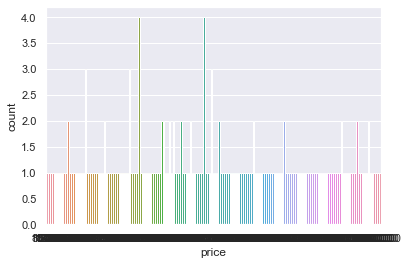

In [781]:
y = df['price']
sns.countplot(y)
price_temp = df.price.value_counts()
print(price_temp)

[Text(0.5, 0, 'Bedrooms'), Text(0, 0.5, 'House Price in MM $')]

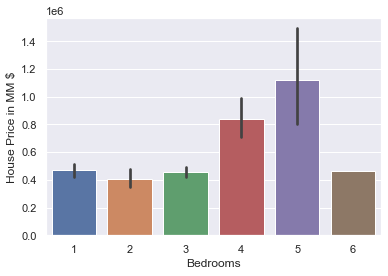

In [782]:
ax = sns.barplot(df['bedrooms'],y)
ax.set(xlabel='Bedrooms', ylabel='House Price in MM $')

[Text(0.5, 0, 'Bathrooms'), Text(0, 0.5, 'House Price in MM $')]

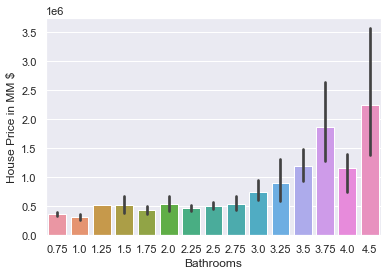

In [783]:
ax=sns.barplot(df['bathrooms'],y)
ax.set(xlabel='Bathrooms', ylabel='House Price in MM $')

In [784]:
### Explore Bedrooms
df['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6])

[Text(0.5, 0, 'Bathrooms'), Text(0, 0.5, 'House Price in MM $ ')]

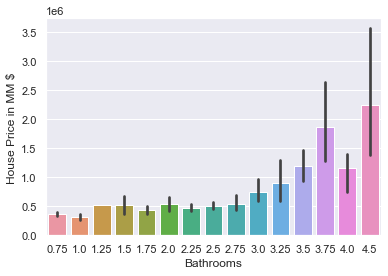

In [785]:
ax = sns.barplot(df['bathrooms'],y)
ax.set(xlabel='Bathrooms', ylabel='House Price in MM $ ')

In [786]:
### Analyse waterfront
df['waterfront'].unique()

array([0, 1])

[Text(0.5, 0, 'Water Front'), Text(0, 0.5, 'House Price in MM $ ')]

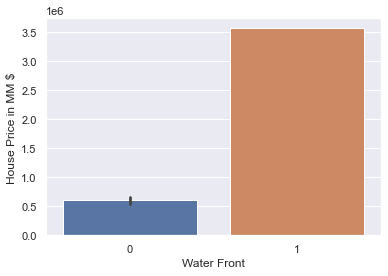

In [787]:
ax = sns.barplot(df['waterfront'],y)
ax.set(xlabel='Water Front', ylabel = 'House Price in MM $ ')

In [788]:
### Zipcodes
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98072, 98007, 98008, 98122,
       98115, 98108, 98117, 98033, 98177, 98065, 98038, 98034, 98077,
       98032, 98005, 98045, 98004, 98027, 98107, 98119, 98198, 98144,
       98118, 98126, 98010, 98056, 98040, 98105, 98042, 98155, 98112,
       98053, 98059, 98052, 98023, 98106, 98092, 98199, 98003, 98001,
       98133, 98103, 98029, 98039, 98055, 98116, 98075, 98030, 98006,
       98166, 98109, 98102, 98146])

[Text(0.5, 0, 'Zipcode'), Text(0, 0.5, 'House Price in MM $')]

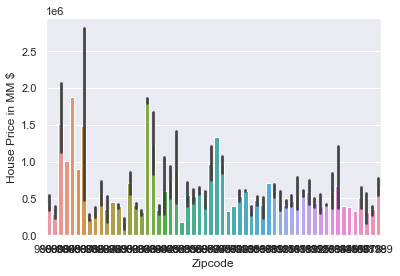

In [789]:
ax = sns.barplot(df['zipcode'], y)
ax.set(xlabel='Zipcode', ylabel = 'House Price in MM $')

In [790]:
### Year renovated
df['yr_renovated'].unique()

array([   0, 1991, 1975, 1994])

[Text(0.5, 0, 'Year Renovated'), Text(0, 0.5, 'House Price in MM $')]

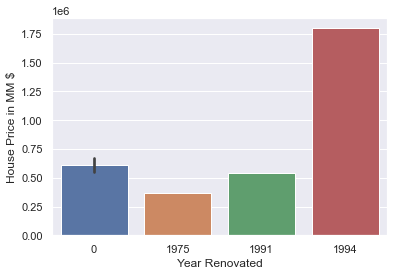

In [791]:
ax = sns.barplot(df['yr_renovated'],y)
ax.set(xlabel='Year Renovated', ylabel='House Price in MM $')

In [792]:
### condition
df['condition'].unique()

array([3, 5, 4, 2])

[Text(0.5, 0, 'Condition'), Text(0, 0.5, 'House Price in $')]

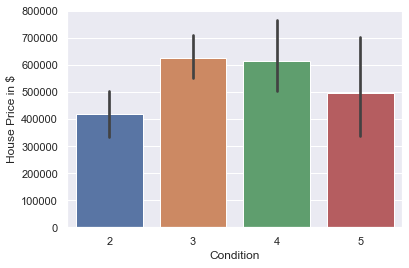

In [793]:
ax = sns.barplot(df['condition'],y)
ax.set(xlabel = 'Condition', ylabel = 'House Price in $')

[Text(0.5, 0, 'View'), Text(0, 0.5, 'House Price in MM $')]

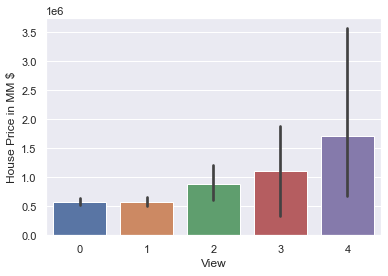

In [794]:
ax = sns.barplot(df['view'], y)
ax.set(xlabel='View', ylabel='House Price in MM $')

                           Train Test split

In [795]:
from sklearn.model_selection import train_test_split

In [796]:
predictors = df.drop("price",axis=1)
price = df["price"]

In [797]:
X_train,X_test,y_train,y_test = train_test_split(predictors,price,test_size=0.20,random_state=0)

X_train.shape

(160, 16)

In [798]:
X_test.shape

(41, 16)

In [799]:
X_train.shape

(160, 16)

In [800]:
y_train.shape

(160,)

In [801]:
y_test.shape

(41,)

In [802]:
### V. Model Fitting
from sklearn.metrics import accuracy_score
### from sklearn.metrics import accuracy_score accuracy_score(ytest, y_model)


In [803]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
### The accuracy score achieved using Logistic Regression is: 0.86%

The accuracy score achieved using Logistic Regression is: 0.0 %


In [804]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
y_pred_nb.shape
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
### The accuracy score achieved using Naive Bayes is: 0.07%

The accuracy score achieved using Naive Bayes is: 0.0 %


In [805]:
### SVM        Support Vector Machines Taking more than TWO Hours for 21607 Rows & 17 Columns (1.4 MB size)
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)
y_pred_svm.shape
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear Support Vector Machines is: "+str(score_svm)+" %")
### The accuracy score achieved using Linear SVM is: 2.44%

The accuracy score achieved using Linear Support Vector Machines is: 2.44 %


In [806]:
### K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn.shape
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
### The accuracy score achieved using KNN is: 0.51%

The accuracy score achieved using KNN is: 0.0 %


In [807]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt.shape)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
### The accuracy score achieved using Decision Tree is: 2.44

(41,)
The accuracy score achieved using Decision Tree is: 2.44 %


In [808]:
### XGBoost
### import xgboost as xgb
### xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
### xgb_model.fit(X_train, y_train)
### y_pred_xgb = xgb_model.predict(X_test)
### print(y_pred_xgb.shape)
### score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
### print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
### The accuracy score achieved using XGBoost is: 

In [809]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf.shape
print(y_pred_rf.shape)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
### The accuracy score achieved using Decision Tree is:

(41,)
The accuracy score achieved using Random Forest is: 4.88 %


In [810]:
### Neural Network
### from keras.models import Sequential
### from keras.layers import Dense
### Using TensorFlow backend.
### https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
### model = Sequential()
### model.add(Dense(11,activation='relu',input_dim=13))
### model.add(Dense(1,activation='sigmoid'))
### model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
### model.fit(X_train,y_train,epochs=300)
### y_pred_nn = model.predict(X_test)
### print(y_pred_nn.shape)
### rounded = [round(x[0]) for x in y_pred_nn]
### print(y_pred_nn = rounded)
### score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)
### print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
### Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.
### The accuracy score achieved using Neural Network is: 
### ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

*************************************

         Output final score
         
*************************************

The accuracy score achieved using Logistic Regression is: 0.0 %
The accuracy score achieved using Naive Bayes is: 0.0 %
The accuracy score achieved using Support Vector Machines is: 2.44 %
The accuracy score achieved using K-Nearest Neighbors is: 0.0 %
The accuracy score achieved using Decision Tree is: 2.44 %
The accuracy score achieved using Random Forest is: 4.88 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

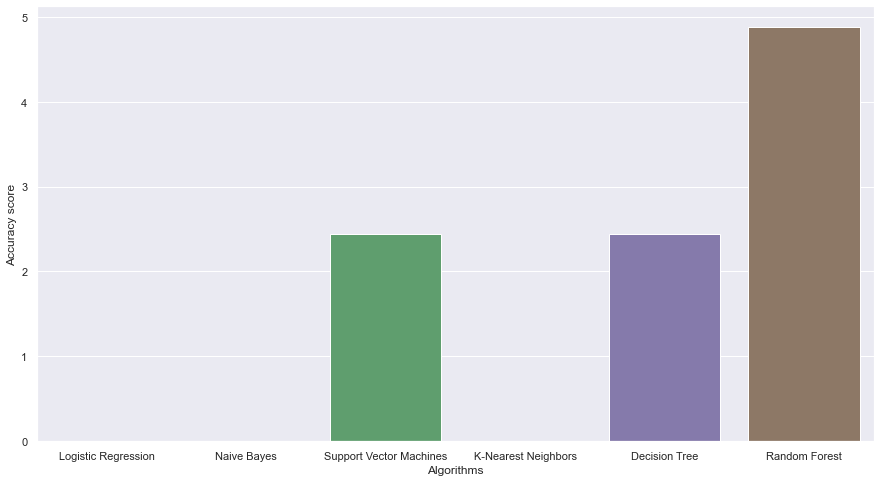

In [811]:
scores = [score_lr, score_nb, score_svm, score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machines","K-Nearest Neighbors","Decision Tree","Random Forest"]    
### print(scores)
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)